<a href="https://colab.research.google.com/github/UOS-COMP1201/code/blob/main/linearprogramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gilp >/dev/null 2>&1

In [ ]:
from gilp.simplex import LP
import numpy as np
from scipy.optimize import linprog
from gilp.simplex import LP
from gilp.visualize import simplex_visual
import matplotlib.pyplot as plt


First example (i.e., "EX1")
maximize $5x_1+3x_2$ subject to

$ \begin{align*}
    2x_1+x_2\le 20\\
    x_1+x_2\le 16\\
    3x_1+2x_2\le 35
\end{align*}
 $

Second example (i.e., "EX2" it is unbounded)
maximize $5x_1+6x_2$ subject to

$
\begin{align*}
x_1+2x_2\ge 8\\
6x_1+4x_2\ge 36\\
x_1\ge 7
\end{align*}
$

In [ ]:
choice="EX2"

In [ ]:
if choice=="EX1":
  c=np.array([5,3])
  A=np.array([[2,1],[1,1],[3,2]])
  b=np.array([20,16,35])
  x1_bounds=(0,None)
  x2_bounds=(0,None)
elif choice=="EX2":
  c=np.array([5,6])
  A=np.array([[-1,-2],[-6,-4],[1,0]])
  b=np.array([-8,-36,7])
  x1_bounds=(0,None)
  x2_bounds=(0,None)
else:
  c=np.array([1,1])
  A=np.array([[1,-3],[2,3]])
  b=np.array([4,17])
  x1_bounds=(0,None)
  x2_bounds=(0,None)

GILP chokes on unbounded problems. Did not take the time to investigate so i skipped EX2 and plot the region at the end of the notebook using matplotlib

In [ ]:
if choice!="EX2":
  lp=LP(A,b,c)
  simplex_visual(lp).show()

For EX2 there is no maximum since it is unbounded. Find the minimum

In [ ]:
# linprog computes the min. If we want to maximize we minimize the negative
if choice !="EX2":
  c=[-x for x in c]

res=linprog(c,A,b,bounds=[x1_bounds,x2_bounds])

In [ ]:
print("optimal value is {} for {}".format(res.fun,res.x))

optimal value is 34.0 for [5.  1.5]


Plot the feasible region for the unbounded problem (EX2)

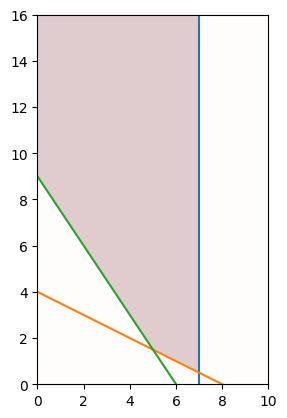

In [ ]:
if choice=="EX2":
  d = np.linspace(0,16,300)
  x,y = np.meshgrid(d,d)
  plt.imshow( ((x<=7) & (2*y>=8-x) & (4*y>=-6*x+36) ).astype(int) , 
                extent=(x.min(),x.max(),y.min(),y.max()),origin="lower", cmap="Reds", alpha = 0.2);
  x = np.linspace(0, 10, 500)
  y= np.linspace(0, 16, 500)
  y1=[7 for z in x]
  y2=4-x/2
  y3=9-3*x/2
  plt.plot(y1,y)  
  plt.plot(x,y2)
  plt.plot(x,y3)
  plt.xlim(0,10)
  plt.ylim(0,16)
